In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 支持向量机(Support Vector Machines)

回顾之前的逻辑回归和神经网络分类的代价函数

$h_{\theta}(x) = \frac{1}{1+e^{-\theta ^ Tx}}$

$ z = -\theta ^ Tx$


$
\text{Cost}(h_{\theta}(x), y) = -y \times \log(h_{\theta}(x)) - (1-y) \times \log(1-h_{\theta}(x))= -y 
log \frac{1}{1+e^{-\theta ^ Tx}} - (1-y)log(1-\frac{1}{1+e^{-\theta ^ Tx}})
$


- 当y=1，我们希望$\theta ^ Tx$尽量大于0:$-log \frac{1}{1+e^{-\theta ^ Tx}}$
- 当y=0，我们希望$\theta ^ Tx$尽量小于0:$-log(1-\frac{1}{1+e^{-\theta ^ Tx}})$




In [2]:
def cost_positive(z):
    return -np.log(1 / (1 + np.exp(-z)))

def cost_negative(z):
    return -np.log(1 - 1 / (1 + np.exp(-z)))

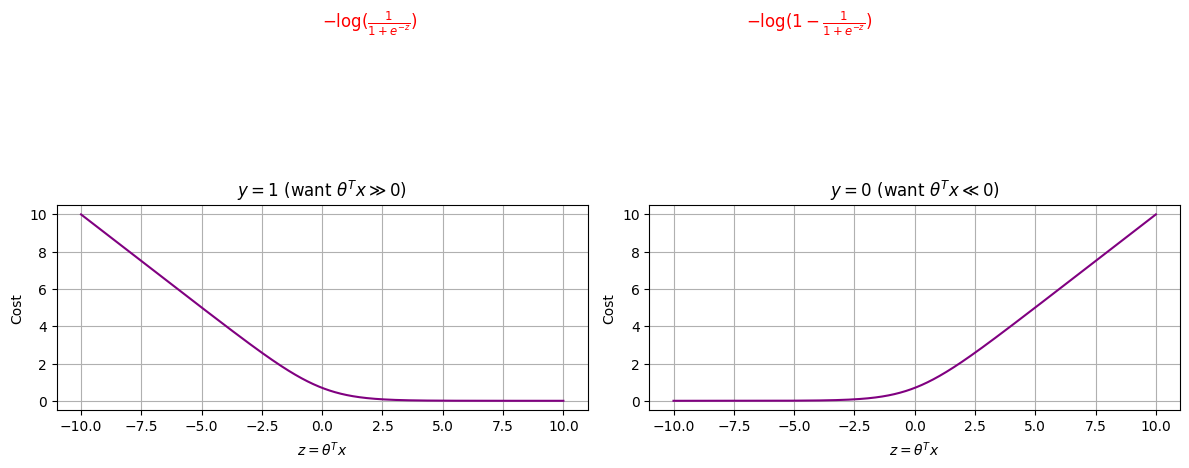

In [33]:
z = np.linspace(-10, 10, 1000)

fig, ax = plt.subplots(1, 2, figsize=(12, 9))

# 对于y = 1的情况
ax[0].plot(z, cost_positive(z), color='purple')
ax[0].set_title("$y = 1$ (want $\\theta^Tx \\gg 0$)")
ax[0].set_xlabel("$z = \\theta^Tx$")
ax[0].set_ylabel("Cost")
ax[0].annotate("$-\\log(\\frac{1}{1+e^{-z}})$", xy=(0, 5), xytext=(0, 20),
               fontsize=12, color='red')
ax[0].grid(True)

# 对于y = 0的情况
ax[1].plot(z, cost_negative(z), color='purple')
ax[1].set_title("$y = 0$ (want $\\theta^Tx \\ll 0$)")
ax[1].set_xlabel("$z = \\theta^Tx$")
ax[1].set_ylabel("Cost")
ax[1].annotate("$-\\log(1-\\frac{1}{1+e^{-z}})$", xy=(-5, 0), xytext=(-7, 20),
               fontsize=12, color='red')
ax[1].grid(True)

plt.tight_layout()
plt.show()

在支持向量机中我们的整个优化目标函数:

**SVM hypothesis**

$$
\min_\theta \, C \sum_{i=1}^{m} \left[ y^{(i)} \, cost_1(\theta^T x^{(i)}) + (1 - y^{(i)}) \, cost_0(\theta^T x^{(i)}) \right] + \frac{1}{2} \sum_{i=1}^{n} \theta_i^2
$$

**Hypothesis:**

$$
h_\theta(x) = 
\begin{cases} 
1 & \text{if } \theta^T x \geq 0 \\
0 & \text{otherwise}
\end{cases}
$$

- 当最小化代价函数获得参数$\theta$时，支持向量机所做的是它来直接预测$y$的值等于1，还是等于0。当$z$大于或者等于0时,学习参数$\theta$就是支持向量机假设函数的形式.
- **人们有时将支持向量机看作是大间距分类器。**

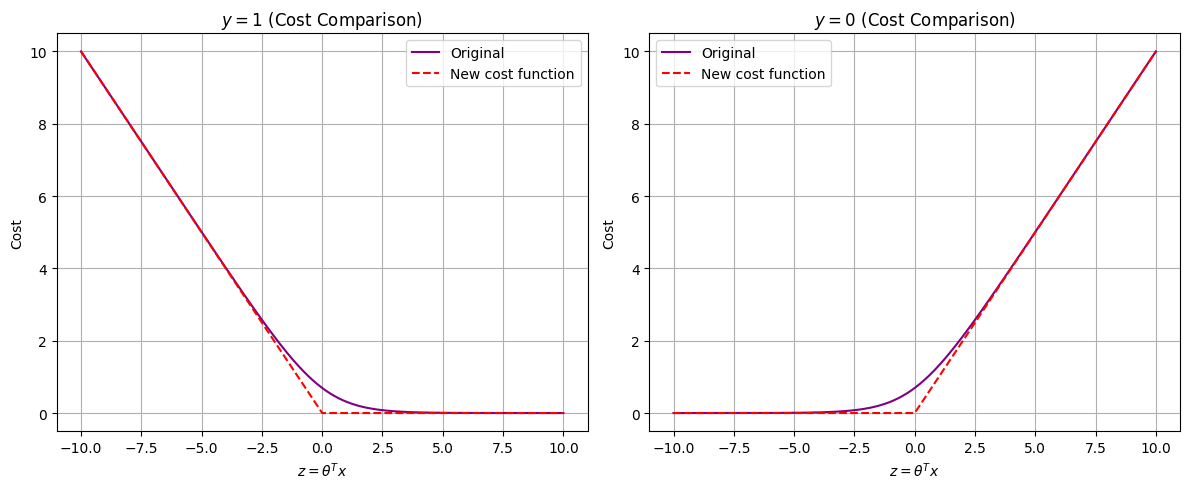

In [31]:
def new_cost_function(z):
    cost = np.where(z < 0, 0, z)
    return cost

# 绘制图像
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# 对于y = 1的情况，使用旧成本函数和新成本函数进行比较
ax[0].plot(z, cost_positive(z), color='purple', label='Original')
ax[0].plot(z, new_cost_function(-z), color='red', linestyle='--', label='New cost function')
ax[0].set_title("$y = 1$ (Cost Comparison)")
ax[0].set_xlabel("$z = \\theta^Tx$")
ax[0].set_ylabel("Cost")
ax[0].legend()
ax[0].grid(True)

# 对于y = 0的情况，使用旧成本函数和新成本函数进行比较
ax[1].plot(z, cost_negative(z), color='purple', label='Original')
ax[1].plot(z, new_cost_function(z), color='red', linestyle='--', label='New cost function')
ax[1].set_title("$y = 0$ (Cost Comparison)")
ax[1].set_xlabel("$z = \\theta^Tx$")
ax[1].set_ylabel("Cost")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

# 决策边界

考察这样一个数据集，其中有正样本，也有负样本，可以看到这个数据集是线性可分的。存在一条直线把正负样本分开。当然有多条不同的直线，可以把正样本和负样本完全分开。

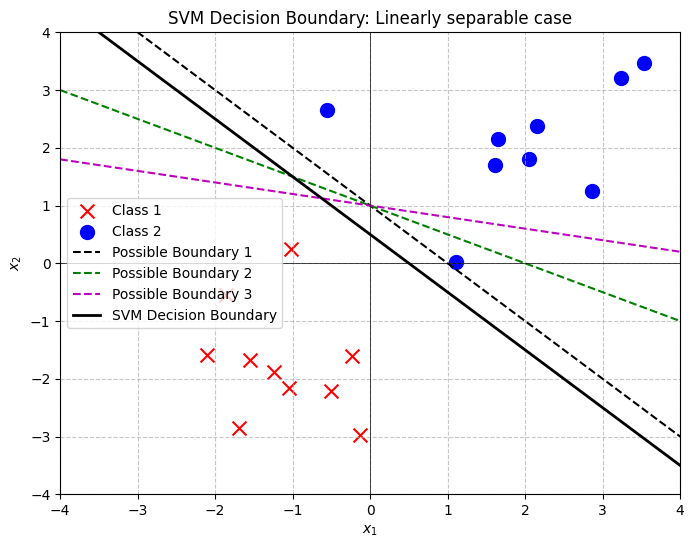

In [34]:
np.random.seed(0)
class_1 = np.random.randn(10, 2) - [2, 2]
class_2 = np.random.randn(10, 2) + [2, 2]

# 绘制数据点
plt.figure(figsize=(8, 6))
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', marker='x', s=100, label='Class 1')
plt.scatter(class_2[:, 0], class_2[:, 1], color='blue', marker='o', s=100, label='Class 2')

# 绘制可能的几条线性分隔线
x_vals = np.linspace(-4, 4, 100)
plt.plot(x_vals, -x_vals + 1, 'k--', label='Possible Boundary 1')
plt.plot(x_vals, -0.5 * x_vals + 1, 'g--', label='Possible Boundary 2')
plt.plot(x_vals, -0.2 * x_vals + 1, 'm--', label='Possible Boundary 3')

# 绘制SVM的决策边界
plt.plot(x_vals, -x_vals + 0.5, 'k-', label='SVM Decision Boundary', linewidth=2)

# 设置图例及标签
plt.title("SVM Decision Boundary: Linearly separable case")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='best')

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()


不同的边界是有好坏之分的，有的只能勉强分开数据点。**而支持向量机会选择一条更稳健的决策边界，在分离正样本和负样本上它显得的更好**。它选择的决策线（譬如上图中的黑线）有更大的距离，这个距离叫做间距(margin).这通常意味着svm会选择一条可以有效地分隔数据点的直线，边界两侧各类点尽可能分散。


---
# 正则化参数C
$$
\min_\theta \, C \sum_{i=1}^{m} \left[ y^{(i)} \, cost_1(\theta^T x^{(i)}) + (1 - y^{(i)}) \, cost_0(\theta^T x^{(i)}) \right] + \frac{1}{2} \sum_{i=1}^{n} \theta_i^2
$$

- 正则化因子常数C可以设置非常大。
- 支持向量机在处理高维特征空间时能够产生较好的分类结果，即通过最大化间隔来分离不同类别。
- 然而，当数据中存在异常值（outlier）时，情况会变得复杂，可能无法找到满意的大间隔分割线。
- **参数调整（C）**： 可以理解为代价函数中的$\frac{1}{\lambda}$
  - 较大的 C 值倾向于减少分类错误，增加了置信度，使分类器更趋向于以每个样本都准确分类构建模型，但是可能会导致过拟合，高方差。
  - 较小的 C 值允许存在分类错误，能建立更加平滑的边界，提升对异常值的耐受力，但是可能会导致低拟合，高偏差。

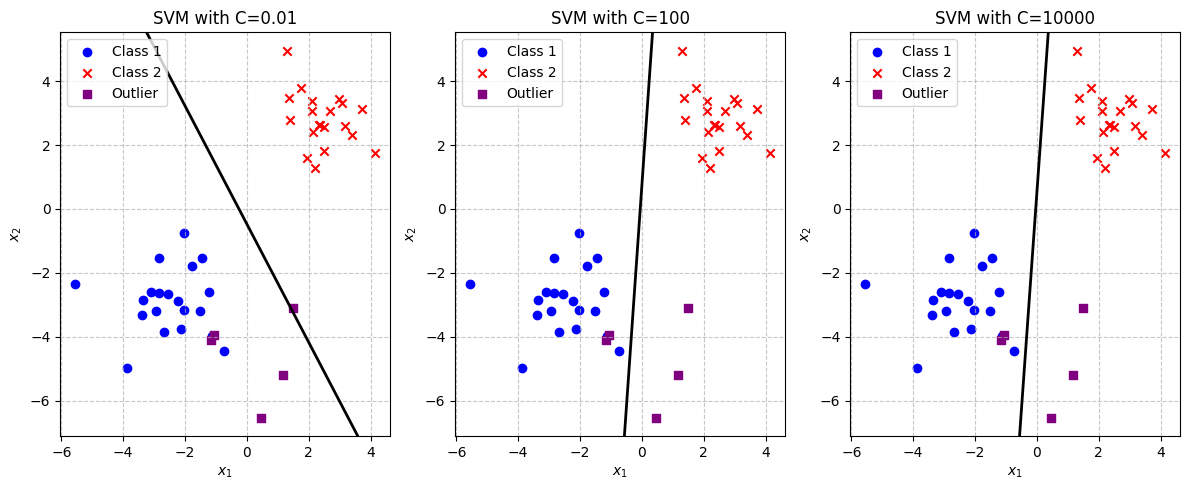

In [44]:
from sklearn.svm import SVC

# 随机生成一些数据点，其中包含异常值
np.random.seed(0)
X_class1 = np.random.randn(20, 2) - [3, 3]
X_class2 = np.random.randn(20, 2) + [3, 3]
# 添加一些异常值
X_outlier = np.random.randn(5, 2) + [0, -5]

X = np.vstack([X_class1, X_class2, X_outlier])
y = np.array([0] * 20 + [1] * 20 + [1] * 5)

# SVM分类器
C_values = [0.01, 100, 10000]  # 小和大的C值

plt.figure(figsize=(12, 5))
for i, C in enumerate(C_values):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)

    plt.subplot(1, 3, i+1)
    plt.scatter(X_class1[:, 0], X_class1[:, 1], color='blue', marker='o', label='Class 1')
    plt.scatter(X_class2[:, 0], X_class2[:, 1], color='red', marker='x', label='Class 2')
    plt.scatter(X_outlier[:, 0], X_outlier[:, 1], color='purple', marker='s', label='Outlier')

    # 绘制决策边界
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30))
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

    plt.title(f"SVM with C={C}")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.legend(loc='best')
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 核函数

支持向量机（SVM）中的核函数是一种数学工具，它允许SVM在高维特征空间进行非线性分类。通过核函数，SVM可以处理那些在原始特征空间中线性不可分的数据集。核函数的主要角色是计算两个样本之间的相似度，并允许在高维空间进行内积运算，而无需明确地计算高维映射。
- 核函数把原始数据映射到高维特征空间，使得在原空间中线性不可分的数据可以在高维空间中线性可分。
- 核函数通过所谓的“核技巧”来计算内积而无需显式地计算高维映射。这避免了高维映射的计算和存储开销。

最常见的是高斯核函数
$$
K(x, x') = \exp\left(-\frac{\|x - x'\|^2}{2\sigma^2}\right)
$$

其中：
- $ \|x - x'\| $ 是样本点 $x$ 和 $x'$ 之间的欧氏距离。
- $\sigma$ 是核的宽度参数，控制样本点在核空间中的影响范围。

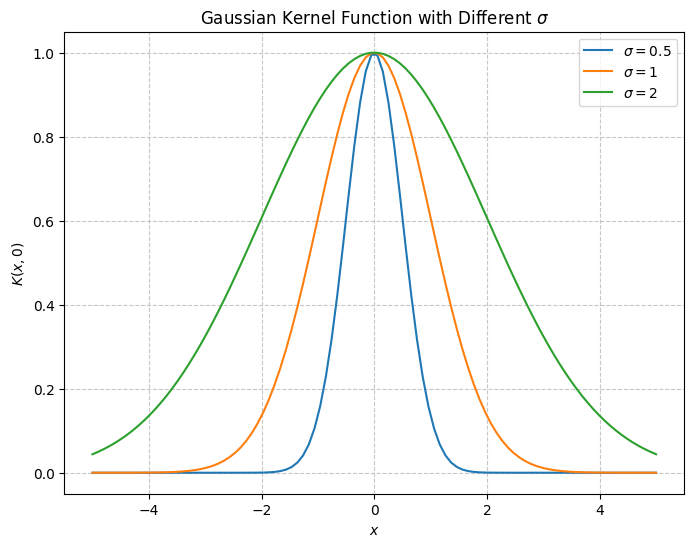

In [51]:
# 定义高斯核函数
def gaussian_kernel(x, x_prime, sigma=1.0):
    return np.exp(-((x - x_prime)**2) / (2 * sigma**2))

x = np.linspace(-5, 5, 100)
x_prime = 0  # 固定的中心点
sigma_values = [0.5, 1, 2]  # 不同的宽度参数

plt.figure(figsize=(8, 6))

for sigma in sigma_values:
    K = gaussian_kernel(x, x_prime, sigma)
    plt.plot(x, K, label=f"$\sigma = {sigma}$")

plt.title("Gaussian Kernel Function with Different $\sigma$")
plt.xlabel("$x$")
plt.ylabel("$K(x, 0)$")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [59]:
from mpl_toolkits.mplot3d import Axes3D

# 定义高斯核函数，以中心点 `l` 作为参数
def gaussian_kernel(x, y, l, sigma):
    return np.exp(-((x - l[0])**2 + (y - l[1])**2) / (2 * sigma**2))

# 创建数据网格
x = np.linspace(-6, 6, 200)
y = np.linspace(-6, 6, 200)
X, Y = np.meshgrid(x, y)

# 中心点
l = np.array([0, 0])  # 可以改变这个中心点的位置

# 不同的 σ^2 值
sigma_values = [0.5, 1, 3]

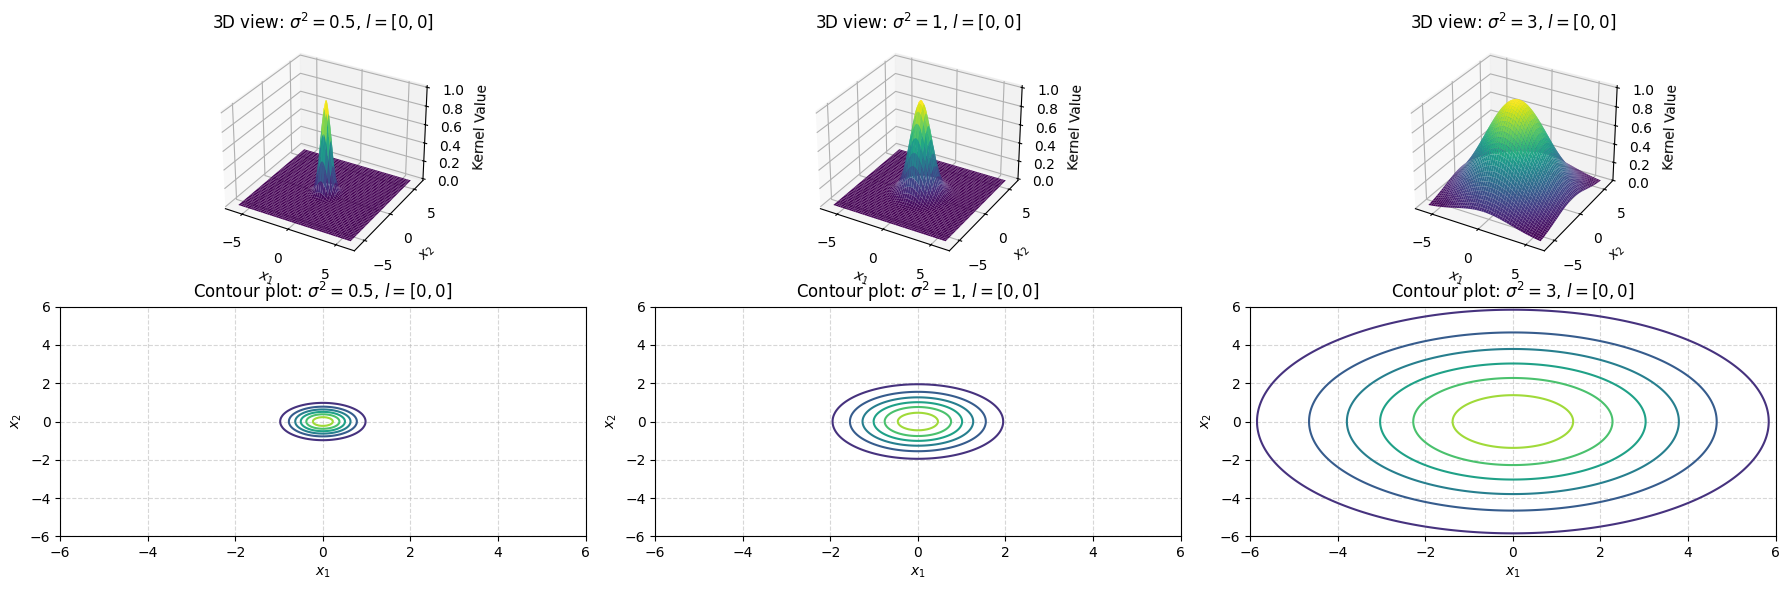

In [60]:
# 绘制图像
fig = plt.figure(figsize=(18, 6))

for i, sigma in enumerate(sigma_values):
    Z = gaussian_kernel(X, Y, l, sigma)
    
    # 绘制3D表面图
    ax = fig.add_subplot(2, len(sigma_values), i + 1, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_title(f"3D view: $\\sigma^2 = {sigma}$, $l=[{l[0]}, {l[1]}]$")
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_zlabel("Kernel Value")

    # 绘制等高线图
    ax = fig.add_subplot(2, len(sigma_values), i + 4)
    ax.contour(X, Y, Z, cmap='viridis')
    ax.set_title(f"Contour plot: $\\sigma^2 = {sigma}$, $l=[{l[0]}, {l[1]}]$")
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


**这种不同的$\sigma$画出的等高线能协助做非线性的分类。**
- 对于每一个输入样本，计算与多个地标$l_1$,$l_2$,$l_3$之间的距离并通过高斯核函数转换为新特征$f_1$,$f_2$,$f_3$
- 分类目标是通过线性组合$\theta_0 + \theta_1 f_1 + \theta_2 f_2 + \theta_3 f_3 > 0$ 判断输入属于 “1” 类或 “0” 类，从而达到分类目的；


In [65]:
landmarks = np.array([[0, 0], [1, 1], [2, -1]])

# 样本点
samples = np.random.randn(50, 2) * 1.5

# 高斯核函数
def gaussian_kernel(x, l, sigma=1.0):
    return np.exp(-np.linalg.norm(x-l)**2 / (2 * sigma**2))

# 计算与地标的核值
f_values = np.array([[gaussian_kernel(sample, l) for l in landmarks] for sample in samples])
f_values

array([[1.82026524e-01, 3.44002436e-01, 7.15571622e-01],
       [6.00903517e-01, 5.31944128e-02, 2.11339862e-02],
       [5.39747710e-01, 1.34443814e-01, 3.57155108e-01],
       [9.62703041e-01, 2.41302710e-01, 7.23885748e-02],
       [1.77036006e-01, 9.03481623e-01, 4.68648367e-02],
       [7.03148866e-02, 1.92053630e-02, 6.46565522e-01],
       [5.65394953e-01, 8.25226515e-02, 1.75339362e-01],
       [1.31613940e-01, 6.99952100e-03, 9.45299473e-02],
       [9.82726102e-02, 5.14156715e-01, 2.86060435e-01],
       [1.01985822e-01, 1.08252380e-02, 7.22045684e-05],
       [2.96091991e-01, 4.26967657e-01, 6.47262974e-01],
       [2.27488051e-02, 1.18494872e-01, 5.03219227e-01],
       [1.97404881e-02, 9.87706647e-02, 5.22977360e-01],
       [1.87197069e-01, 4.25335779e-01, 6.03797542e-01],
       [4.09598826e-01, 1.35615941e-01, 5.40439461e-01],
       [4.20774303e-02, 5.95604746e-04, 5.83455865e-03],
       [2.21952236e-02, 2.40729290e-04, 2.52734111e-05],
       [3.34578598e-01, 2.02410

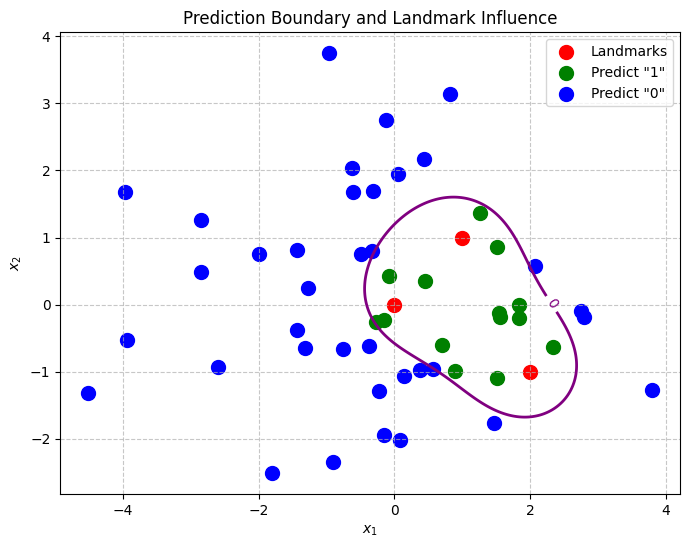

In [66]:
theta = np.array([-0.5, 0.4, 0.5, 0.6]) # 示例权重， 不是真的参数
predicted_labels = theta[0] + np.dot(f_values, theta[1:]) > 0


# 绘图
plt.figure(figsize=(8, 6))
# 绘制地标
plt.scatter(landmarks[:, 0], landmarks[:, 1], color='red', s=100, label='Landmarks')

# 绘制样本点
plt.scatter(samples[predicted_labels][:, 0], samples[predicted_labels][:, 1], color='green', s=100, label='Predict "1"')
plt.scatter(samples[~predicted_labels][:, 0], samples[~predicted_labels][:, 1], color='blue', s=100, label='Predict "0"')

x_range = np.linspace(-2, 3, 200)
y_range = np.linspace(-2, 3, 200)
X, Y = np.meshgrid(x_range, y_range)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        f_temp = [gaussian_kernel([X[i, j], Y[i, j]], l) for l in landmarks]
        Z[i, j] = theta[0] + np.dot(theta[1:], f_temp)

contour = plt.contour(X, Y, Z, levels=[0], colors='purple', linewidths=2)
plt.clabel(contour, inline=True, fontsize=10)
plt.title("Prediction Boundary and Landmark Influence")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()